In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from common import NWSL, Fonts, Colors, Images, add_twitter_handle, add_source, Data

In [6]:
df = pd.read_csv("../playoff-constraints/2024.csv")
df["season"] = "2024"
df

,date,home,away,home_score,away_score,season
0,2024-03-16,KC,POR,5.0,4.0,2024
1,2024-03-16,LOU,ORL,2.0,2.0,2024
2,2024-03-16,UTA,CHI,0.0,2.0,2024
3,2024-03-16,NC,HOU,5.0,1.0,2024
4,2024-03-17,RGN,WAS,1.0,0.0,2024
...,...,...,...,...,...,...
177,2024-11-01,UTA,NJY,NaN,NaN,2024
178,2024-11-02,ORL,RGN,NaN,NaN,2024
179,2024-11-02,HOU,BFC,NaN,NaN,2024
180,2024-11-03,CHI,KC,NaN,NaN,2024


In [7]:
table = Data.get_nwsl_standings(df)
table

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points
1,ORL,14,5,0,37.0,12.0,25.0,47
2,WAS,13,2,4,39.0,21.0,18.0,41
3,KC,11,5,3,43.0,28.0,15.0,38
4,NJY,11,4,4,23.0,17.0,6.0,37
5,NC,10,1,8,26.0,20.0,6.0,31
6,POR,8,3,8,29.0,27.0,2.0,27
7,BFC,8,0,11,24.0,31.0,-7.0,24
8,CHI,7,2,10,25.0,28.0,-3.0,23
9,LA,6,3,10,22.0,31.0,-9.0,21
10,RGN,5,5,9,23.0,32.0,-9.0,20


In [9]:
remaining = df[df["home_score"].isna()]
remaining

,date,home,away,home_score,away_score,season
133,2024-09-13,NC,BFC,NaN,NaN,2024
134,2024-09-13,POR,CHI,NaN,NaN,2024
135,2024-09-13,ORL,KC,NaN,NaN,2024
136,2024-09-14,LOU,LA,NaN,NaN,2024
137,2024-09-14,UTA,SD,NaN,NaN,2024
138,2024-09-15,WAS,HOU,NaN,NaN,2024
139,2024-09-16,RGN,NJY,NaN,NaN,2024
140,2024-09-20,KC,WAS,NaN,NaN,2024
141,2024-09-20,BFC,ORL,NaN,NaN,2024
142,2024-09-21,LOU,NC,NaN,NaN,2024


In [25]:
def get_index(team):
    return table[table["team"] == team].index[0]


for team in table["team"]:
    team_index = get_index(team)
    subset = remaining[(remaining["home"] == team) | (remaining["away"] == team)]
    subset.loc[:, "opp_rank"] = subset.apply(
        lambda row: get_index(row["away"])
        if team == row["home"]
        else get_index(row["home"]),
        axis=1,
    )
    subset.loc[:, "below"] = subset["opp_rank"] > team_index
    subset.loc[:, "above"] = subset["opp_rank"] < team_index
    table.loc[team_index, ["above", "below"]] = [
        subset["above"].sum(),
        subset["below"].sum(),
    ]

<ipython-input-25-3ddf114838ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, "opp_rank"] = subset.apply(
<ipython-input-25-3ddf114838ce>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, "below"] = subset["opp_rank"] > team_index
<ipython-input-25-3ddf114838ce>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [26]:
table

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points,above,below
1,ORL,14,5,0,37.0,12.0,25.0,47,0.0,7.0
2,WAS,13,2,4,39.0,21.0,18.0,41,1.0,6.0
3,KC,11,5,3,43.0,28.0,15.0,38,2.0,5.0
4,NJY,11,4,4,23.0,17.0,6.0,37,2.0,5.0
5,NC,10,1,8,26.0,20.0,6.0,31,1.0,6.0
6,POR,8,3,8,29.0,27.0,2.0,27,1.0,6.0
7,BFC,8,0,11,24.0,31.0,-7.0,24,5.0,2.0
8,CHI,7,2,10,25.0,28.0,-3.0,23,5.0,2.0
9,LA,6,3,10,22.0,31.0,-9.0,21,4.0,3.0
10,RGN,5,5,9,23.0,32.0,-9.0,20,4.0,3.0


<ipython-input-49-8a04b2487c4d>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(map(lambda x: NWSL.name("KCC" if x == "KC" else x), table["team"])))


<Figure size 4000x3200 with 0 Axes>

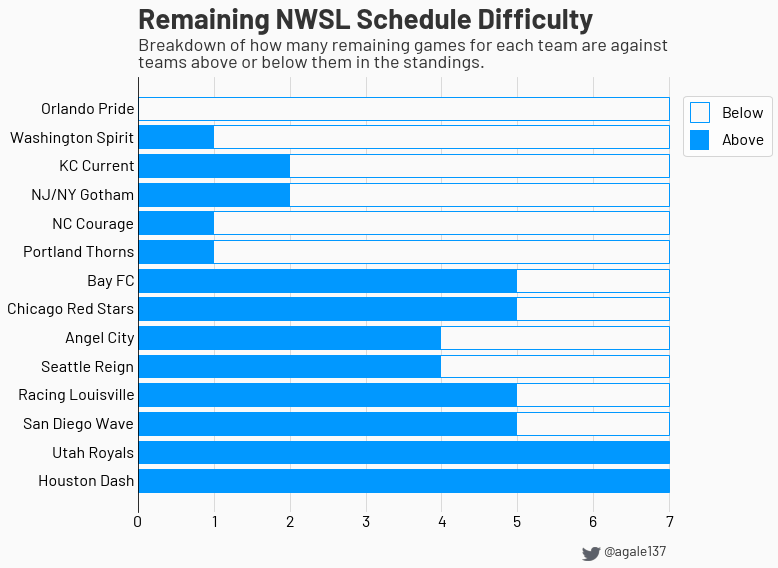

In [49]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
ax.set_facecolor(Colors.WHITE)
fig.patch.set_facecolor(Colors.WHITE)

BLUE = "#0198FF"

# Plot data
b1 = plt.barh(table["team"], table["above"] + table["below"], color=Colors.WHITE, edgecolor=BLUE)
b2 = plt.barh(table["team"], table["above"], color=BLUE)

# Legend
fp = Fonts.BARLOW
fp.set_size(16)
plt.rcParams['legend.handlelength'] = 1.2
plt.rcParams['legend.handleheight'] = 1.5
plt.legend([b1, b2], ["Below", "Above"], loc="lower right", prop=fp, bbox_to_anchor=(1.15, 0.8))

# Axes
ax.spines[["top", "bottom", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.invert_yaxis()
ax.set_yticklabels(list(map(lambda x: NWSL.name("KCC" if x == "KC" else x), table["team"])))
ax.tick_params(axis="both", which="both", length=0)
for label in ax.get_yticklabels() + ax.get_xticklabels():
    fp = Fonts.BARLOW
    fp.set_size(16)
    label.set_fontproperties(fp)

# Title
ax.text(
    0,
    -2.8,
    "Remaining NWSL Schedule Difficulty",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Subtitle
ax.text(
    0,
    -1.4,
    "Breakdown of how many remaining games for each team are against\nteams above or below them in the standings.",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.74, y=0.04, fs=14, w=0.025)

# Save image
plt.savefig(
    "images/schedule_difficulty.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)